In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
import warnings

# Suppress UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

In [33]:
# Read data
df = pd.read_csv('../data/mall_customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [34]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [35]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [36]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [37]:
# Encode the Genre column
encoder = LabelEncoder()
df["Genre"] = encoder.fit_transform(df["Genre"])

In [38]:
# Select columns for clustering
features = ["Genre", "Age", "Annual Income (k$)", "Spending Score (1-100)"]
cluster_features = df[features]

In [39]:
cluster_features

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


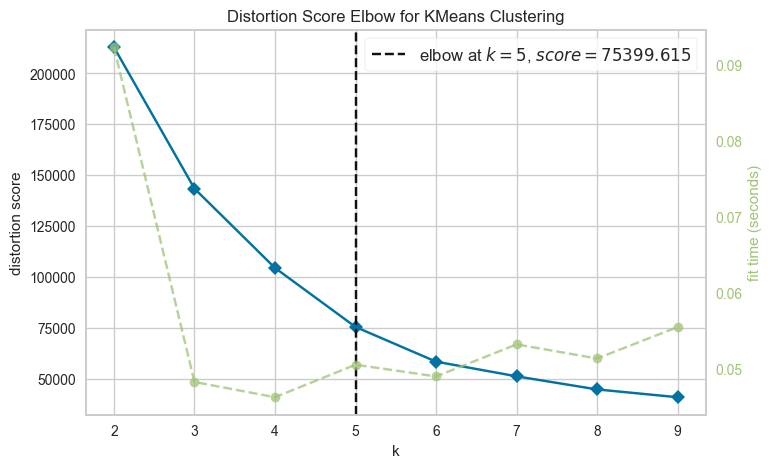

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
# Find the optimal number of clusters using the Elbow method
fig, ax = plt.subplots(figsize=(8, 5))
elbow_visualizer = KElbowVisualizer(KMeans(n_init=10, random_state=42), k=(2, 10), ax=ax)
elbow_visualizer.fit(cluster_features)
elbow_visualizer.show()

In [55]:
# Get the optimal number of clusters
best_k = elbow_visualizer.elbow_value_ if elbow_visualizer.elbow_value_ else 4
print(f"Optimal number of clusters: {best_k}")

Optimal number of clusters: 5


In [57]:
# Apply K-Means with the optimal number of clusters
kmeans_model = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster_Label"] = kmeans_model.fit_predict(cluster_features)

In [58]:
# Evaluate the clustering model
silhouette_avg = silhouette_score(cluster_features, df["Cluster_Label"])
davies_bouldin = davies_bouldin_score(cluster_features, df["Cluster_Label"])
calinski_harabasz = calinski_harabasz_score(cluster_features, df["Cluster_Label"])

print("\n**K-Means Model Evaluation**:")
print(f"    Silhouette Score: {silhouette_avg:.3f} (Higher is better)")
print(f"    Davies-Bouldin Score: {davies_bouldin:.3f} (Lower is better)")
print(f"    Calinski-Harabasz Score: {calinski_harabasz:.3f} (Higher is better)")


**K-Means Model Evaluation**:
    Silhouette Score: 0.444 (Higher is better)
    Davies-Bouldin Score: 0.822 (Lower is better)
    Calinski-Harabasz Score: 150.946 (Higher is better)


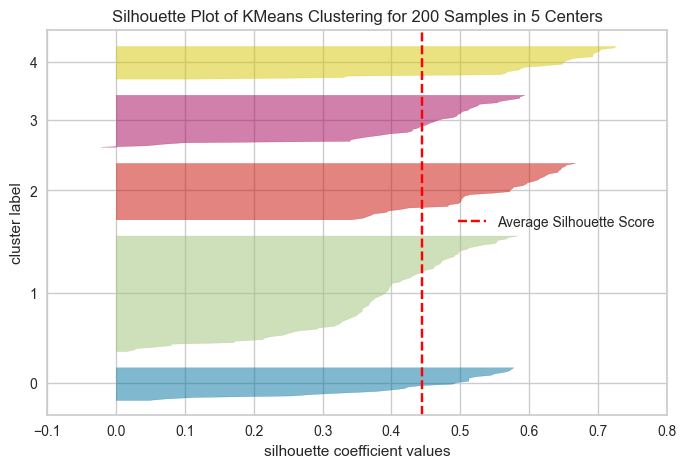

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [59]:
# Visualize Silhouette Score
fig, ax = plt.subplots(figsize=(8, 5))
silhouette_visualizer = SilhouetteVisualizer(kmeans_model, ax=ax, colors='yellowbrick')
silhouette_visualizer.fit(cluster_features)
silhouette_visualizer.show()

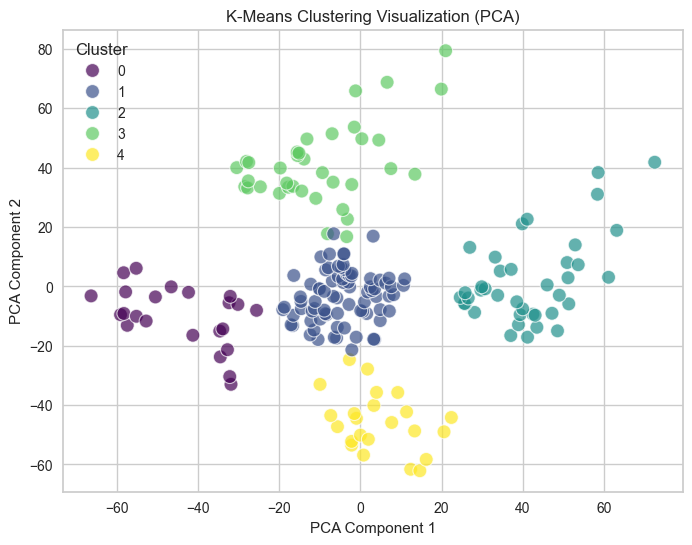

In [60]:
# Reduce dimensions using PCA to visualize clustering
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(cluster_features)

# Visual chart with PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_transformed[:, 0],
    y=pca_transformed[:, 1],
    hue=df["Cluster_Label"],
    palette="viridis",
    s=100,
    alpha=0.7
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering Visualization (PCA)")
plt.legend(title="Cluster")
plt.show()

In [61]:
# Display data results after clustering
df[["CustomerID", "Cluster_Label"]]

,CustomerID,Cluster_Label
0,1,0
1,2,4
2,3,0
3,4,4
4,5,0
...,...,...
195,196,2
196,197,3
197,198,2
198,199,3


In [62]:
df[["CustomerID", "Cluster_Label"]].to_csv("../data/kmeans_clustering_result.csv", index=False)